In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ler.rates import LeR
from ler.utils import get_param_from_json

Setting multiprocessing start method to 'fork'


In [61]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS', 
          mtot_max=51, 
          z_max=5,
          source_priors=dict(
            merger_rate_density="merger_rate_density_bbh_popI_II_oguri2018",
            source_frame_masses="binary_masses_uniform",
            ),
          source_priors_params=dict(
            merger_rate_density=dict(
                R0=(10.55-0.0)*1e-08,
                b2=1.6,
                b3=2.0,
                b4=30,
            ),
            source_frame_masses=dict(
                m_min=1,
                m_max=3,
            ),
            ),
          lens_priors=dict(
            velocity_dispersion="velocity_dispersion_gengamma",
            ),
          lens_priors_params=dict(
            velocity_dispersion=dict(a=2.32 / 2.67, c=2.67, vd_min=10, vd_max=350),
            ),
          psds={'L1':'o4_psd.txt'},
          snr_type="interpolation",
          ) 


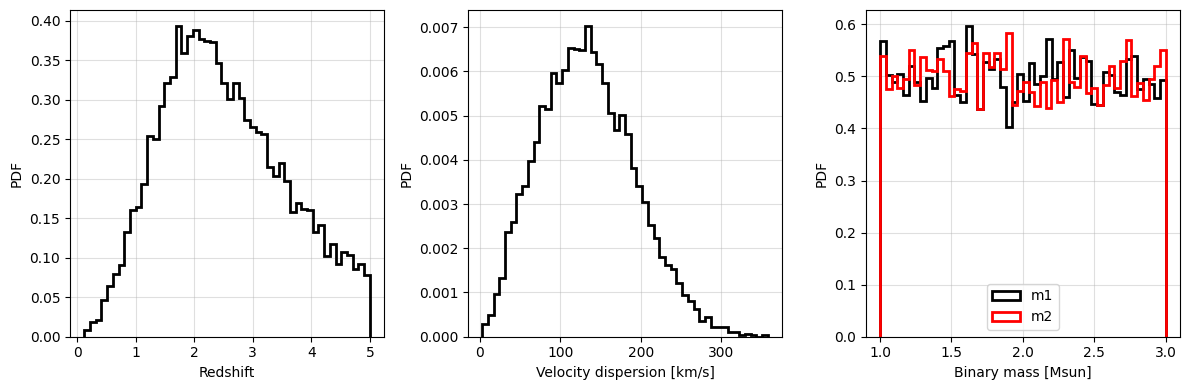

In [50]:
# plot the redshift, velocity dispersion, and binary mass priors side by side
zs = ler.sample_zs(10000)
vd = ler.sample_velocity_dispersion(10000)
m1, m2 = ler.sample_source_frame_masses(10000)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# merger rate density
ax[0].hist(zs, bins=50, histtype='step', color='k', lw=2, density=True)
ax[0].set_xlabel('Redshift')
ax[0].set_ylabel('PDF')
ax[0].grid(alpha=0.4)

# velocity dispersion
ax[1].hist(vd, bins=50, histtype='step', color='k', lw=2, density=True)
ax[1].set_xlabel('Velocity dispersion [km/s]')
ax[1].set_ylabel('PDF')
ax[1].grid(alpha=0.4)

# binary masses
ax[2].hist(m1, bins=50, histtype='step', color='k', lw=2, density=True, label='m1')
ax[2].hist(m2, bins=50, histtype='step', color='r', lw=2, density=True, label='m2')
ax[2].set_xlabel('Binary mass [Msun]')
ax[2].set_ylabel('PDF')
ax[2].legend()
ax[2].grid(alpha=0.4)

plt.tight_layout()
plt.show()

## Unlensed Median

In [54]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=10.0, output_jsonfile='n_unlensed_detectable_bns_uniformL1_median.json', meta_data_file='n_unlensed_detectable_bns_uniforL1_meta_median.json', resume=True);

collected number of detectable events =  500
stored detectable unlensed params in ./ler_data/n_unlensed_detectable_bns_uniformL1_median.json
stored meta data in ./ler_data/n_unlensed_detectable_bns_uniforL1_meta_median.json

 trmming final result to size=500
collected number of detectable events =  500
total number of events =  69600000.0
total unlensed event rate (yr^-1): 2.968305119162622


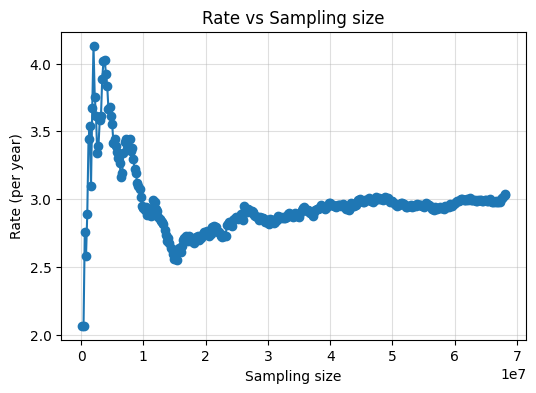

In [55]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_uniformL1_meta_median.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [56]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 5e7)[0]
# take average 
rate_unlensed_median = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed_median)

Rate (per year) = 2.97013354547461


## Lensed median

In [63]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=40, 
    batch_size=200000, 
    snr_threshold=10.0, 
    num_img=1,
    output_jsonfile='n_lensed_detectable_bns_uniformL1_median.json',meta_data_file='n_lensed_detectable_bns_uniformL1_meta_median.json',
    resume=True
);

collected number of detectable events =  42
storing detectable lensed params in ./ler_data/n_lensed_detectable_bns_uniformL1_median.json
storing meta data in ./ler_data/n_lensed_detectable_bns_uniformL1_meta_median.json

 trmming final result to size=40
collected number of detectable events =  40
total number of events =  6666667.0
total lensed event rate (yr^-1): 0.0019677755623839386


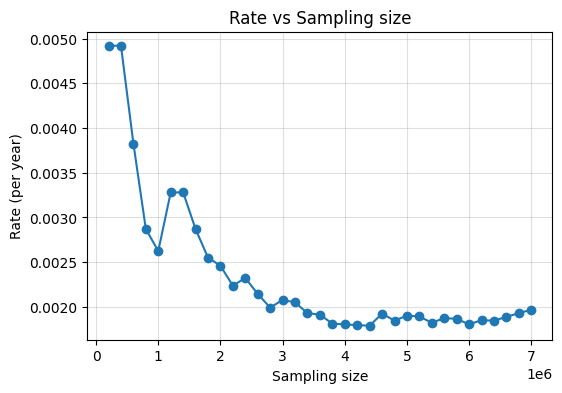

In [62]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_uniformL1_meta_median.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [65]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 5e6)[0]
# take average 
rate_lensed_median = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed_median)

Rate (per year) = 0.0018739395628767446


In [66]:
rate_lensed_median/rate_unlensed_median, rate_lensed_median, rate_unlensed_median

(0.0006309277122343332, 0.0018739395628767446, 2.97013354547461)

## Unlensd low

In [35]:
ler = LeR(npool=8,
          verbose=True, 
          event_type='BNS', 
          mtot_max=51,  # for SNR interpolation
          z_max=5,
          psds={'L1':'o4_psd.txt'},
          snr_type="interpolation",
          source_priors=dict(
            merger_rate_density='merger_rate_density_bbh_popI_II_oguri2018',
            source_frame_masses='binary_masses_uniform',
            ),
          source_priors_params=dict(
            merger_rate_density=dict(
                R0=(10.55-8.39)*1e-08,
                b2=1.6,
                b3=2.0,
                b4=30,
            ),
            source_frame_masses=dict(
                m_min=1,
                m_max=3,
            ),
          ),
          )

z_to_luminosity_distance interpolator will be loaded from ./interpolator_pickle/z_to_luminosity_distance/z_to_luminosity_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_2.pickle
merger_rate_density interpolator will be loaded from ./interpolator_pickle/merger_rate_density/merger_rate_density_3.pickle
z_to_Dc interpolator will be loaded from ./interpolator_pickle/z_to_Dc/z_to_Dc_1.pickle
Dc_to_z interpolator will be loaded from ./interpolator_pickle/Dc_to_z/Dc_to_z_1.pickle
angular_diameter_distance interpolator will be loaded from ./interpolator_pickle/angular_diameter_distance/angular_diameter_distance_1.pickle
differential_comoving_volume interpolator will be loaded from ./interpolator_pickle/differential_comoving_volume/differential_comoving_volume_3.pickle
velocity_dispersion_ewoud interpolator will be loaded from ./interpolator_pickle/velocity_dispersion_ewoud/velocity_d

In [29]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=10.0, output_jsonfile='n_unlensed_detectable_bns_O4psd_low.json', meta_data_file='n_unlensed_detectable_bns_meta_O4psd_low.json', resume=False);

removing ./ler_data/n_unlensed_detectable_bns_O4psd_low.json and ./ler_data/n_unlensed_detectable_bns_meta_O4psd_low.json if they exist
collected number of detectable events =  0
given detectability_condition == 'step_function'
collected number of detectable events =  1
total number of events =  200000
total rate (yr^-1): 0.42297925914164175
given detectability_condition == 'step_function'
collected number of detectable events =  2
total number of events =  400000
total rate (yr^-1): 0.42297925914164175
given detectability_condition == 'step_function'
collected number of detectable events =  7
total number of events =  600000
total rate (yr^-1): 0.9869516046638308
given detectability_condition == 'step_function'
collected number of detectable events =  11
total number of events =  800000
total rate (yr^-1): 1.1631929626395148
given detectability_condition == 'step_function'
collected number of detectable events =  11
total number of events =  1000000
total rate (yr^-1): 0.9305543701116

SystemError: CPUDispatcher(<function get_interpolated_snr at 0x33defaef0>) returned a result with an exception set

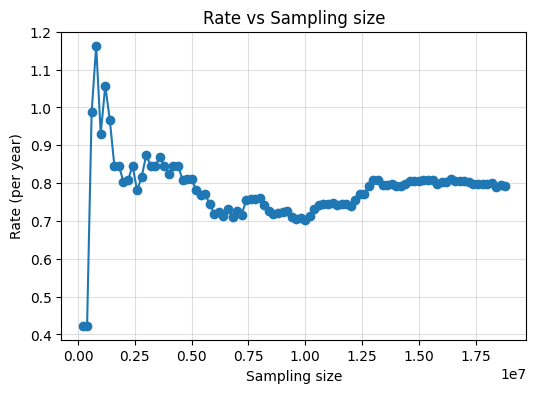

In [31]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta_O4psd_low.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [32]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1.5e7)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 0.8014450867085529


In [25]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=200000,snr_threshold=10.0, num_img=2, output_jsonfile='n_lensed_detectable_bns_O4psd_low.json', meta_data_file='n_lensed_detectable_bns_meta_O4psd_low.json', resume=True)

collected number of detectable events =  9


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 46.06it/s]


given detectability_condition == step_function
collected number of detectable events =  11
total number of events =  1000000
total rate (yr^-1): 0.001759157877496366


100%|█████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 91.92it/s]


given detectability_condition == step_function
collected number of detectable events =  14
total number of events =  1200000
total rate (yr^-1): 0.00186577350643554


100%|██████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 125.49it/s]


given detectability_condition == step_function
collected number of detectable events =  14
total number of events =  1400000
total rate (yr^-1): 0.0015992344340876056


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 33.63it/s]


given detectability_condition == step_function
collected number of detectable events =  17
total number of events =  1600000
total rate (yr^-1): 0.0016991865862180811


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 32.68it/s]


given detectability_condition == step_function
collected number of detectable events =  17
total number of events =  1800000
total rate (yr^-1): 0.0015103880766382943


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 43.74it/s]


given detectability_condition == step_function
collected number of detectable events =  17
total number of events =  2000000
total rate (yr^-1): 0.0013593492689744648


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 70.56it/s]


given detectability_condition == step_function
collected number of detectable events =  19
total number of events =  2200000
total rate (yr^-1): 0.0013811570112574776


100%|██████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 114.96it/s]


given detectability_condition == step_function
collected number of detectable events =  23
total number of events =  2400000
total rate (yr^-1): 0.001532599666000622


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 76.01it/s]


SystemError: CPUDispatcher(<function get_interpolated_snr at 0x339ffae60>) returned a result with an exception set

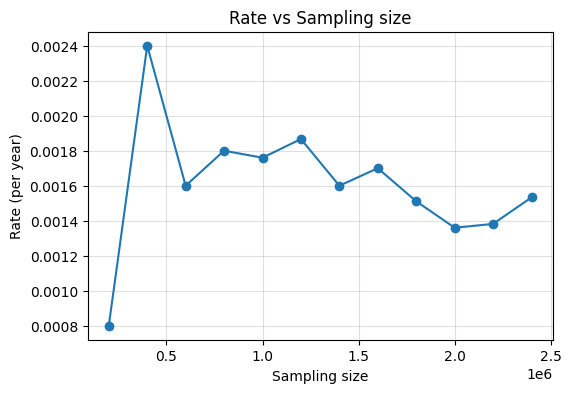

In [33]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta_O4psd_low.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [34]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1.5e6)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.001496536121817788


In [35]:
rate_unlensed/rate_lensed, rate_unlensed, rate_lensed

(535.533406126587, 0.8014450867085529, 0.001496536121817788)

## HIGH

In [14]:
ler = LeR(npool=8,
          verbose=False, 
          event_type='BNS',
          source_priors= {'merger_rate_density': 'merger_rate_density_bbh_popI_II_oguri2018'},
          source_priors_params= {'merger_rate_density': {'R0': (10.55+19.02)*1e-08, 'b2': 1.6, 'b3': 2.0, 'b4': 30}},
          mtot_max=51, 
          z_max=5,
          psds={'L1':'o4_psd.txt', 'H1':'o4_psd.txt'},
          snr_type="interpolation",
          )

In [16]:
# snr_cut=8.0
ler.selecting_n_unlensed_detectable_events(size=500, batch_size=200000,snr_threshold=10.0, output_jsonfile='n_unlensed_detectable_bns_O4psd_high.json', meta_data_file='n_unlensed_detectable_bns_meta_O4psd_high.json', resume=False);

removing ./ler_data/n_unlensed_detectable_bns_O4psd_high.json and ./ler_data/n_unlensed_detectable_bns_meta_O4psd_high.json if they exist
collected number of detectable events =  0
given detectability_condition == 'step_function'
collected number of detectable events =  2
total number of events =  200000
total rate (yr^-1): 11.581015456313281
given detectability_condition == 'step_function'
collected number of detectable events =  7
total number of events =  400000
total rate (yr^-1): 20.266777048548242
given detectability_condition == 'step_function'
collected number of detectable events =  10
total number of events =  600000
total rate (yr^-1): 19.301692427188804
given detectability_condition == 'step_function'
collected number of detectable events =  13
total number of events =  800000
total rate (yr^-1): 18.819150116509082
given detectability_condition == 'step_function'
collected number of detectable events =  13
total number of events =  1000000
total rate (yr^-1): 15.05532009320

SystemError: CPUDispatcher(<function get_interpolated_snr at 0x33defaef0>) returned a result with an exception set

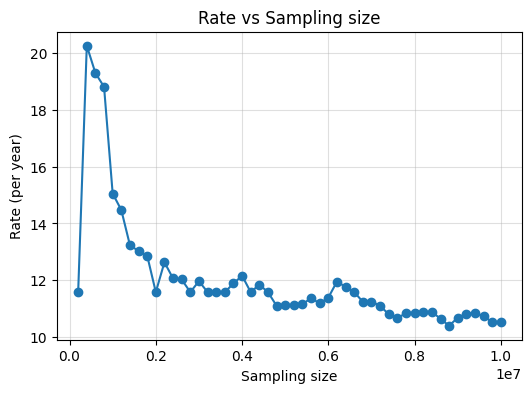

In [17]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_unlensed_detectable_bns_meta_O4psd_high.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [18]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 0.8e7)[0]
# take average 
rate_unlensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_unlensed)

Rate (per year) = 10.694204000316123


In [19]:
# snr_cut=8.0
# time will take long time sample
ler.selecting_n_lensed_detectable_events(size=1000, batch_size=200000,snr_threshold=10.0, num_img=2, output_jsonfile='n_lensed_detectable_bns_O4psd_high.json', meta_data_file='n_lensed_detectable_bns_meta_O4psd_high.json', resume=True)

collected number of detectable events =  0


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 76.70it/s]


given detectability_condition == step_function
collected number of detectable events =  3
total number of events =  200000
total rate (yr^-1): 0.03283983487220175


100%|█████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 80.69it/s]


given detectability_condition == step_function
collected number of detectable events =  5
total number of events =  400000
total rate (yr^-1): 0.027366529060168118


100%|█████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.63it/s]


given detectability_condition == step_function
collected number of detectable events =  5
total number of events =  600000
total rate (yr^-1): 0.018244352706778745


100%|█████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 99.29it/s]


given detectability_condition == step_function
collected number of detectable events =  7
total number of events =  800000
total rate (yr^-1): 0.019156570342117683


100%|█████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 35.41it/s]


given detectability_condition == step_function
collected number of detectable events =  11
total number of events =  1000000
total rate (yr^-1): 0.024082545572947943


100%|█████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 65.25it/s]


given detectability_condition == step_function
collected number of detectable events =  14
total number of events =  1200000
total rate (yr^-1): 0.025542093789490246


100%|█████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 33.43it/s]


given detectability_condition == step_function
collected number of detectable events =  18
total number of events =  1400000
total rate (yr^-1): 0.028148429890458636


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 61.90it/s]


given detectability_condition == step_function
collected number of detectable events =  19
total number of events =  1600000
total rate (yr^-1): 0.025998202607159716


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 55.32it/s]


given detectability_condition == step_function
collected number of detectable events =  22
total number of events =  1800000
total rate (yr^-1): 0.026758383969942158


  1%|▌                                                      | 2170/200000 [00:00<00:52, 3801.80it/s]


KeyboardInterrupt: 

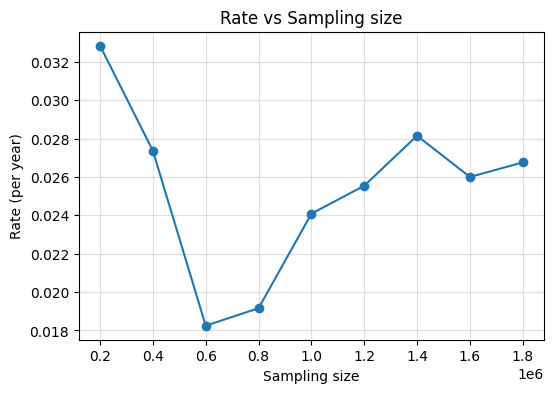

In [20]:
# let's see how rate varies with sampling size
meta_data = get_param_from_json('ler_data/n_lensed_detectable_bns_meta_O4psd_high.json')
# plot the rate vs sampling size
plt.figure(figsize=(6,4))
plt.plot(meta_data['events_total'], meta_data['total_rate'], 'o-')
plt.xlabel('Sampling size')
plt.ylabel('Rate (per year)')
plt.title('Rate vs Sampling size')
plt.grid(alpha=0.4)
plt.show()

In [21]:
# select only events after sampling size of 
idx = np.where(meta_data['events_total'] > 1.2e6)[0]
# take average 
rate_lensed = np.mean(meta_data['total_rate'][idx])
print('Rate (per year) =', rate_lensed)

Rate (per year) = 0.02696833882252017


In [23]:
rate_unlensed/rate_lensed, rate_unlensed, rate_lensed

(396.5466345812084, 10.694204000316123, 0.02696833882252017)

In [24]:
10.694-3.427

7.267000000000001